# Question 1: Eigenface for face recognition

## b)

In [11]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import imageio
from sklearn.linear_model import LogisticRegression
%matplotlib inline

(540, 2500) (540,)


/var/folders/dp/_pc3s4994bqbbsvrm8jrtt480000gn/T/ipykernel_5894/1895977526.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(line.strip().split()[0])


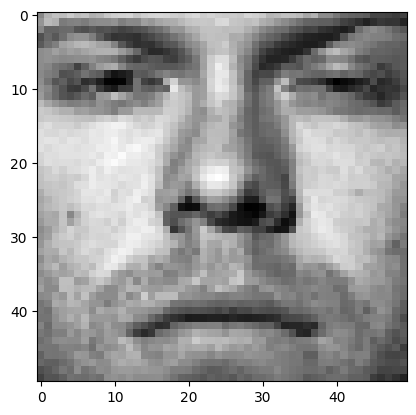

In [12]:
# train data
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

/var/folders/dp/_pc3s4994bqbbsvrm8jrtt480000gn/T/ipykernel_5894/3298261081.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(line.strip().split()[0])


(100, 2500) (100,)


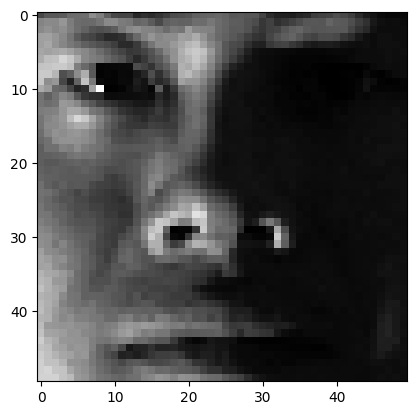

In [13]:
# test data
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

## c)

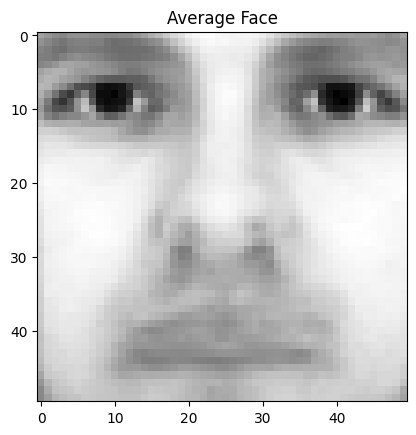

In [14]:
avg_face = np.zeros((2500,), dtype = float)
for x in range(0, train_data.shape[0]):
    avg_face += train_data[x, :]
avg_face /= train_data.shape[0]

plt.figure()
plt.title('Average Face')
plt.imshow(avg_face.reshape(50, 50), cmap = cm.Greys_r)

## d)

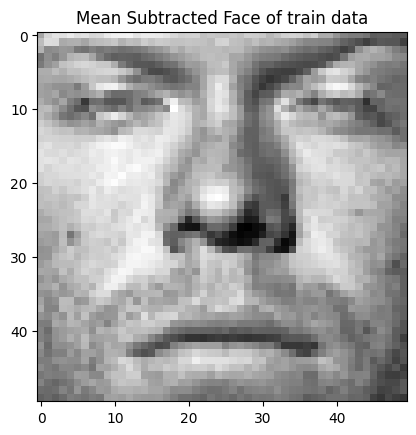

In [15]:
# mean subtracted face of train data
mean_sub_data1 = train_data.copy()
for x in range(0, train_data.shape[0]):
    mean_sub_data1[x, :] -= avg_face

plt.figure()
plt.title('Mean Subtracted Face of train data')
plt.imshow(mean_sub_data1[10,:].reshape(50, 50), cmap = cm.Greys_r)

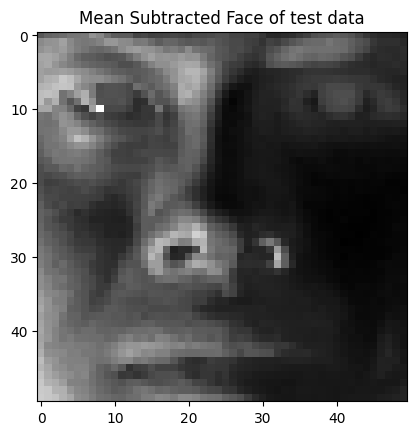

In [16]:
# mean subtracted face of test data
mean_sub_data2 = test_data.copy()
for x in range(0, test_data.shape[0]):
    mean_sub_data2[x, :] -= avg_face

plt.figure()
plt.title('Mean Subtracted Face of test data')
plt.imshow(mean_sub_data2[10,:].reshape(50, 50), cmap = cm.Greys_r)

## e)

/var/folders/dp/_pc3s4994bqbbsvrm8jrtt480000gn/T/ipykernel_5894/2285356666.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)


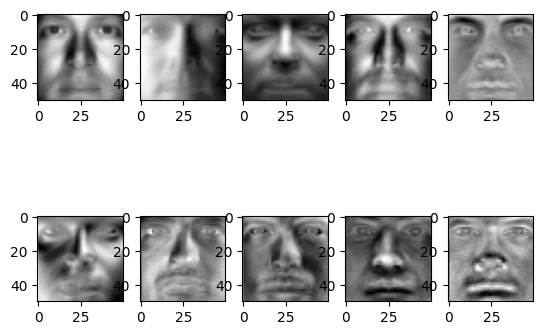

In [17]:
eigenvec, eigenval, vt = np.linalg.svd(mean_sub_data1)
plt.figure()
for i in np.arange(10):
    plt.subplot(2,5,i+1)
    img = vt[i,:].reshape(50,50)
    plt.imshow(img, cmap='gray')
    plt.title('10 Eigen Faces')

plt.show()

## f)

In [18]:
def get_feature_matrix(r, eigen_face, X):
    return X.dot(np.transpose(eigen_face[:r,:]))

## g)

In [19]:
# Part I
r = 10
F_feature_matrix_train = get_feature_matrix(r, vt, mean_sub_data1)
F_feature_matrix_test = get_feature_matrix(r, vt, mean_sub_data2)

logistic_regression_model = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000)
logistic_regression_model.fit(F_feature_matrix_train, train_labels)

test_acc = logistic_regression_model.score(F_feature_matrix_test, test_labels)
print('Testing Accuracy : ' + str(test_acc * 100) + '%')

Testing Accuracy : 79.0%


In [20]:
# Part II
Accuracy = np.zeros(200)
for r in range(1, 201):
    F_feature_matrix_train = get_feature_matrix(r, vt, mean_sub_data1)
    F_feature_matrix_test = get_feature_matrix(r, vt, mean_sub_data2)
    logistic_regression_model.fit(F_feature_matrix_train, train_labels)
    Accuracy[r-1] = logistic_regression_model.score(F_feature_matrix_test, test_labels) * 100

Accuracy

array([14., 12., 12., 18., 42., 35., 50., 64., 72., 79., 81., 82., 85.,
       85., 86., 89., 87., 84., 85., 87., 89., 86., 89., 90., 90., 90.,
       90., 90., 91., 92., 92., 93., 91., 90., 91., 92., 95., 92., 94.,
       96., 93., 96., 97., 95., 93., 93., 96., 92., 92., 94., 93., 93.,
       94., 93., 93., 93., 93., 92., 92., 86., 89., 89., 91., 92., 91.,
       92., 93., 94., 92., 92., 89., 90., 90., 90., 86., 87., 86., 86.,
       86., 85., 85., 85., 86., 90., 91., 92., 91., 91., 92., 91., 90.,
       92., 93., 92., 92., 93., 93., 93., 93., 93., 96., 93., 93., 95.,
       94., 94., 94., 94., 92., 91., 92., 93., 93., 95., 94., 94., 94.,
       95., 95., 95., 95., 95., 95., 94., 94., 94., 96., 94., 96., 97.,
       97., 97., 97., 97., 97., 95., 95., 95., 96., 96., 96., 96., 96.,
       96., 96., 96., 96., 95., 96., 97., 97., 97., 97., 97., 97., 97.,
       97., 97., 97., 97., 97., 97., 97., 97., 97., 97., 97., 97., 97.,
       97., 97., 97., 97., 97., 97., 97., 97., 97., 97., 97., 97

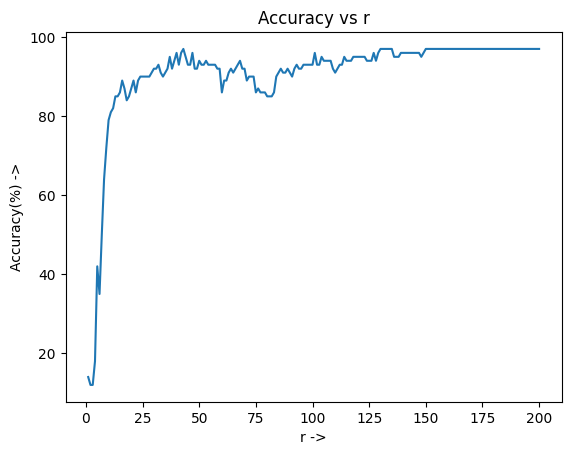

In [21]:
plt.figure()
plt.title('Accuracy vs r')
plt.xlabel('r ->')
plt.ylabel('Accuracy(%) ->')
plt.plot(np.linspace(1,200,200),Accuracy)
plt.show()